### <center>San Jose State University<br>Department of Applied Data Science</center>
#  <center>DATA 220<br>Mathematical Methods for Data Analysis</center>
### <center>Fall 2020<br>Instructor: Ron Mak</center>
#  <center>Assignment #12<br>Polynomial Regression and Markov Chain Problem Set</center>
#### <center>100 points total (25 points each)<br><br>Work together with your lab partner.<br>Write your solutions in one or more cells after each problem.<br>Whenever possible, use matrix operations and not loops.<br>You can add your own functions or other support code.</center>
#### <center>Due December 3, 2020</center>

<hr>

#### <strong>PROBLEM 1.</strong> Find the least-squares quadratic (degree 2) regression line through the following set of points.

In [1]:
xs = [11, 12, 13, 14, 15, 17, 18, 19, 20, 21,
      24, 25, 27, 28, 31, 32, 33, 36, 37, 38,
      40, 41, 44, 45, 46, 49, 50, 51, 54, 55]

ys = [11.3, 15.1,  6.6, 12.9, 12.1, 18.1, 20.9, 17.6, 11.0, 24.6,
      11.3, 18.4, 16.2, 19.5, 35.8, 37.1, 45.7, 34.8, 25.6, 26.7,
      22.0, 26.0, 10.5, 18.6, 21.1, 11.9, 13.7, 13.7,  6.3,  1.8]

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sum_x_power(xs, power):
    """
    Compute the sum of the x values raised to a given power.
    @param xs the x values.
    @param power the given power.
    @return the sum.
    """
    sum = 0
    
    # Loop over the x values.
    for i in range(len(xs)):
        sum += xs[i]**power
    
    return sum

def sum_x_power_y(xs, ys, power):
    """
    Compute the sum of the x values raised to a given power
    and multiplied by the corresponding y value.
    @param xs the x values.
    @param yx the y values.
    @param power the given power.
    @return the sum.
    """
    sum = 0
    
    # Loop over the x and y values.
    for i in range(len(xs)):
        sum += (xs[i]**power)*ys[i]
    
    return sum

def polynomial_regression(degree, xs, ys):
    """
    Compute the coefficients of a polynomial regression.
    @param degree the degree of the regression equation.
    @param xs the x values.
    @param ys the y values.
    """
    size = degree + 1
    A = np.zeros([size, size])  # coefficient matrix
    b = np.zeros(size)          # right-hand side
    
    # Loop over each equation.
    for r in range(size):
        
        # The multiplier of the first term.
        sum = sum_x_power(xs, r)  
        
        # Copy that multiplier up the diagonal.
        j = 0
        for i in range(r, -1, -1):
            A[i][j] = sum
            j += 1
        
        # Right-hand side value.
        b[r] = sum_x_power_y(xs, ys, r)
        
    # Multipliers of the terms in the last equation.
    for c in range(1, size):
        
        # The multiplier of the second term.
        sum = sum_x_power(xs, degree + c)
        
        # Copy that multiplier up the diagonal.
        i = degree
        for j in range(c, size):
            A[i][j] = sum
            i -= 1
    
    # Solve the system to obtain the regression coefficients.
    a = np.linalg.solve(A, b)
    
    return [A, b, a]

def at(x, a, degree):
    """
    Compute the value of the regression function at a given x value.
    @param x the x value.
    @param a the coefficients of the regression function.
    @param degree the degree of the regression function.
    @return the function value.
    """
    n       = degree + 1
    x_power = 1
    y       = 0
    
    # Loop to compute the function value y.
    for i in range(n):
        y += a[i]*x_power
        x_power *= x
    
    return y

def plot_polynomial_regression(xs, ys, degree=0, y_axis_pos=0, size=(6, 6)):
    """
    Plot a polynomial regression line among a scatter plot of x, y values.
    @param xs the x values.
    @param ys the y values.
    @param degree the degree of the regression equation.
    @param y_pos the y position of the x axis.
    @param size the size of the graph.
    @return the vector of coefficients
    """
    fig = plt.figure(figsize=size)

    ax = fig.add_subplot(1, 1, 1)

    ax.spines['left'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    #ax.spines['bottom'].set_position(('data', y_axis_pos))
    ax.spines['top'].set_color('none')

    plt.scatter(xs, ys)
    
    if degree > 0:
        A, b, a  = polynomial_regression(degree, xs, ys)
        x_values = np.linspace(min(xs), max(xs), 100)
        y_preds  = np.array([at(x, a, degree)for x in x_values])    
        plt.plot(x_values, y_preds, color='red')
    else:
        a = None
    
    plt.show()
    return a

def plot_polynomial(xs, ys, a, degree=0, x_min=0, x_max=math.nan, y_axis_pos=0, size=(6, 6)):
    """
    Plot a polynomial regression line among a scatter plot of x, y values.
    @param xs the x values.
    @param ys the y values.
    @param a  the vector of coefficients.
    @param degree the degree of the regression equation.
    @param y_pos the y position of the x axis.
    @param size the size of the graph.
    """
    fig = plt.figure(figsize=size)
    
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['left'].set_position(('data', 0))
    ax.spines['right'].set_color('none')
    #ax.spines['bottom'].set_position(('data', y_axis_pos))
    ax.spines['top'].set_color('none')

    plt.scatter(xs, ys)
    
    if degree > 0:
        if math.isnan(x_max):
            x_max = max(xs)
        x_values = np.linspace(x_min, x_max, 100)
        y_preds  = np.array([at(x, a, degree)for x in x_values])    
        plt.plot(x_values, y_preds, color='red')
    else:
        a = None
    
    plt.show()


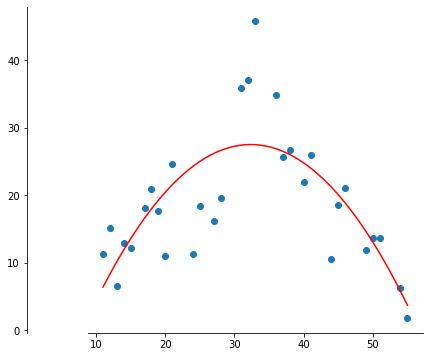

array([-20.96713356,   2.99575668,  -0.04631508])

In [3]:
plot_polynomial_regression(xs, ys, degree=2)

In [4]:
A, b, a = polynomial_regression(2, xs, ys)

print('Coefficient matrix A:')
print(A)

print()
print('Right hand side b:')
print(b)

print()
print('Regression coefficients a:')
print(a)

Coefficient matrix A:
[[3.0000000e+01 9.4600000e+02 3.5368000e+04]
 [9.4600000e+02 3.5368000e+04 1.4737060e+06]
 [3.5368000e+04 1.4737060e+06 6.5637328e+07]]

Right hand side b:
[5.669000e+02 1.786420e+04 6.333008e+05]

Regression coefficients a:
[-20.96713356   2.99575668  -0.04631508]


#### Print the quadratic equation and plot it among the points.

<hr>

#### <strong>PROBLEM 2.</strong> If you have <em>n</em> points and you generate a least-squares polynomial of degree <em>n</em>-1, you've calculated the <u>interpolation</u> line that runs through all <em>n</em> points. This is also known as <u>polynomial curve fitting</u>.

#### Calculate and plot the interpolation line for these points: (-2, 3), (-1, 5), (0, 1), (1, 4), and (2, 10).

In [5]:
x2 = [-2,-1,0,1,2]
y2 = [ 3, 5,1,4,10]

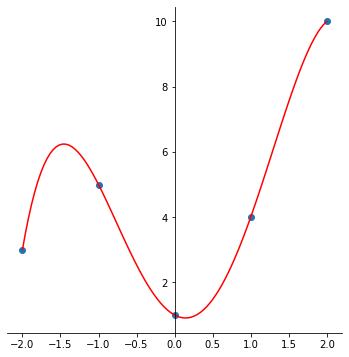

array([ 1.        , -1.25      ,  4.20833333,  0.75      , -0.70833333])

In [6]:
plot_polynomial_regression(x2, y2, degree=4)

In [7]:
A, b, a = polynomial_regression(4, x2, y2)


print('Coefficient matrix A:')
print(A)

print()
print('Right hand side b:')
print(b)

print()
print('Regression coefficients a:')
print(a)


Coefficient matrix A:
[[  5.   0.  10.   0.  34.]
 [  0.  10.   0.  34.   0.]
 [ 10.   0.  34.   0. 130.]
 [  0.  34.   0. 130.   0.]
 [ 34.   0. 130.   0. 514.]]

Right hand side b:
[ 23.  13.  61.  55. 217.]

Regression coefficients a:
[ 1.         -1.25        4.20833333  0.75       -0.70833333]


<hr>

#### <strong>PROBLEM 3.a.</strong> Amalgamated Widgets, Inc. ranks its employees by productivity: 1 (lowest), 2, 3, and 4 (highest). The following table shows for each rank, at the start of a new training program, the percentage of employees, the percentage productivity loss per employee, and the total percentage productivity loss.

<table>
    <tr><th>Rank</th><th>Employees</th><th>x</th><th>Productivity loss</th><th>=</th><th>Total loss</th></tr>
    <tr><td align=center>1</td><td align=center>30%</td><td></td><td align=center>40%</td><td></td><td align=center>12.00%</td></tr>
    <tr><td align=center>2</td><td align=center>35%</td><td></td><td align=center>25%</td><td></td><td align=center>&nbsp;8.75%</td></tr>
    <tr><td align=center>3</td><td align=center>25%</td><td></td><td align=center>15%</td><td></td><td align=center>&nbsp;3.75%</td></tr>
    <tr><td align=center>4</td><td align=center>10%</td><td></td><td align=center>&nbsp;5%</td><td></td><td align=center>&nbsp;0.50%</td></tr>
    <tr><th align=right colspan=5>Overall total</th><th align=center>25.00%</th></tr>
</table>

#### The training supervisor provided the following table that predicts what percentage of employees will move from one rank to another or stay in the same rank after each hourly training session, as determined by a test given at the end of the hour:

<table>
    <tr><th colspan=5 align=center>FROM:</th></tr>
    <tr><th>TO:</th><th>1</th><th>2</th><th>3</th><th>4</th></tr>
    <tr><th>1</th><td align=center>50%</td><td align=center>30%</td><td align=center>10%</td><td align=center>10%</td>
    <tr><th>2</th><td align=center>30%</td><td align=center>40%</td><td align=center>20%</td><td align=center>10%</td>
    <tr><th>3</th><td align=center>20%</td><td align=center>30%</td><td align=center>20%</td><td align=center>10%</td>
    <tr><th>4</th><td align=center>&nbsp;&nbsp;0%</td><td align=center>&nbsp;&nbsp;0%</td><td align=center>50%</td><td align=center>70%</td>
</table>

#### If training ends after two consecutive sessions with no rank changes (to the extent of Python's floating-point precision), how many hours will the training program last?

In [8]:
import numpy as np

In [9]:
X = np.array([[0.30],
             [0.35],
             [0.25],
             [0.10]])

P = np.array([[0.50, 0.30, 0.10, 0.10],
              [0.30, 0.40, 0.20, 0.10],
              [0.20, 0.30, 0.20, 0.10],
              [   0,    0, 0.50, 0.70]])

In [10]:
print('Initial:')
print(X)

Initial:
[[0.3 ]
 [0.35]
 [0.25]
 [0.1 ]]


In [11]:
for hours in range(1, 49): # Checking 48 hours
    X = P@X
    
    print(f'After hours {hours}:')
    print(X)

After hours 1:
[[0.29 ]
 [0.29 ]
 [0.225]
 [0.195]]
After hours 2:
[[0.274 ]
 [0.2675]
 [0.2095]
 [0.249 ]]
After hours 3:
[[0.2631 ]
 [0.256  ]
 [0.20185]
 [0.27905]]
After hours 4:
[[0.25644 ]
 [0.249605]
 [0.197695]
 [0.29626 ]]
After hours 5:
[[0.252497 ]
 [0.245939 ]
 [0.1953345]
 [0.3062295]]
After hours 6:
[[0.2501866 ]
 [0.24381455]
 [0.19397095]
 [0.3120279 ]]
After hours 7:
[[0.24883755]
 [0.24257878]
 [0.19317866]
 [0.315405  ]]
After hours 8:
[[0.24805078]
 [0.24185901]
 [0.19271738]
 [0.31737284]]
After hours 9:
[[0.24759211]
 [0.2414396 ]
 [0.19244862]
 [0.31851967]]
After hours 10:
[[0.24732476]
 [0.24119516]
 [0.19229199]
 [0.31918808]]
After hours 11:
[[0.24716894]
 [0.2410527 ]
 [0.19220071]
 [0.31957765]]
After hours 12:
[[0.24707812]
 [0.24096967]
 [0.1921475 ]
 [0.31980471]]
After hours 13:
[[0.24702518]
 [0.24092127]
 [0.1921165 ]
 [0.31993705]]
After hours 14:
[[0.24699433]
 [0.24089307]
 [0.19209842]
 [0.32001418]]
After hours 15:
[[0.24697634]
 [0.24087663]
 [0

### Based on the above results we can see that after hour 33, values seem to reach a steady state as there is no change after that irrespective of the number of iterations. This is cross-verified with the steady state results done in 3b.

<hr>

#### <strong>PROBLEM 3.b.</strong> Compute directly (without iteration) the percentages of employees in each rank after all the training sessions have ended. Revise the first table in Problem 3.a to show the new percentage of employees in each rank. Assume the productivity loss of each rank hasn't changed, and include the new total loss percentage per rank and the overall total loss percentage. What percentage improvement resulted from the training?

In [12]:
A = np.array([[-0.50, 0.30, 0.10, 0.10],
              [0.30, -0.60, 0.20, 0.10],
              [0.20, 0.30, -0.80, 0.10],
              [   0,    0, 0.50, -0.30]])

b = np.array([[0], [0], [0], [0]])

In [13]:
r1 = np.array([-0.50, 0.30, 0.10, 0.10])
r2 = np.array([0.30, -0.60, 0.20, 0.10])
r3 = np.array([0.20, 0.30, -0.80, 0.10])
r4 = np.array([   0,    0, 0.50, -0.30])

A = np.array([r1, r2, r3, r4])
A

array([[-0.5,  0.3,  0.1,  0.1],
       [ 0.3, -0.6,  0.2,  0.1],
       [ 0.2,  0.3, -0.8,  0.1],
       [ 0. ,  0. ,  0.5, -0.3]])

In [14]:
from numpy.linalg import inv

A = np.array([[-0.5,  0.3,  0.1,  0.1],
              [ 0.3, -0.6,  0.2,  0.1],
              [ 0.2,  0.3, -0.8,  0.1],
              [ 0. ,  0. ,  0.5, -0.3],
              [ 1  ,  1  ,  1  ,  1  ]])

b = np.array([[0], [0], [0], [0], [1]])

In [ ]:
AT = A.T
AT

In [ ]:
ATA = AT@A
ATA

In [ ]:
ATAinv = inv(ATA)
ATAinv

In [ ]:
ATb = AT@b
ATb

In [ ]:
print("The steady state matrix:")

xhat = ATAinv@ATb
xhat

### Percentages of employees in each rank after training

In [ ]:
tot = 0.24695122 + 0.24085366 + 0.19207317 + 0.32012195
a_1 = 0.24695122/tot * 100
b_2 = 0.24085366/tot * 100
c_3 = 0.19207317/tot * 100
d_4 = 0.32012195/tot * 100

print(f' percentage of employees in 1st category is: {a_1}')
print(f' percentage of employees in 2nd category is: is: {b_2}')
print(f' percentage of employees in 3rd category is: is: {c_3}')
print(f' percentage of employees in 4th category is: is: {d_4}')
 


### Revised table based on new values

In [ ]:
print(f'Rank Employees    Productivity_loss    Total_loss')
print(f'1    {a_1}%     40%                  9.8780488%')
print(f'2    {b_2}%     25%                  6.0213415%')
print(f'3    {c_3}%     15%                  2.8810975500000002%')
print(f'4    {d_4}%      5%                  1.6006097499999998%')
print(f'               Overall loss percentage:  20.3810976% ')

### Percentage improvement due to training sessions

In [ ]:
imp = 25.00 - 20.3810976

print(f' Percentage improvement due to training sessions: {imp}% ')